<a href="https://colab.research.google.com/github/2002valli/CODSOFT-/blob/main/TITANIC_INTERN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [ ]:
df=pd.read_csv("/content/tested.csv",index_col=False)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [ ]:
df.shape

(418, 12)

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
df.drop(['PassengerId','Name','SibSp','Parch','Embarked','Cabin','Ticket'],axis='columns',inplace=True)

In [ ]:
df.head(10)

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,34.5,7.8292
1,1,3,female,47.0,7.0000
2,0,2,male,62.0,9.6875
3,0,3,male,27.0,8.6625
4,1,3,female,22.0,12.2875
5,0,3,male,14.0,9.2250
6,1,3,female,30.0,7.6292
7,0,2,male,26.0,29.0000
8,1,3,female,18.0,7.2292
9,0,3,male,21.0,24.1500


In [ ]:
df=df.dropna()


In [ ]:
inputs = df.drop('Survived',axis='columns')
target = df.Survived

In [ ]:
inputs.Sex = inputs.Sex.map({'male': 1, 'female': 2})

In [ ]:
inputs.Age[:10]

0    34.5
1    47.0
2    62.0
3    27.0
4    22.0
5    14.0
6    30.0
7    26.0
8    18.0
9    21.0
Name: Age, dtype: float64

In [ ]:
inputs.Age = inputs.Age.fillna(inputs.Age.mean())

In [ ]:
inputs.head()

,Pclass,Sex,Age,Fare
0,3,1,34.5,7.8292
1,3,2,47.0,7.0000
2,2,1,62.0,9.6875
3,3,1,27.0,8.6625
4,3,2,22.0,12.2875


In [ ]:
df.head(10)

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,34.5,7.8292
1,1,3,female,47.0,7.0000
2,0,2,male,62.0,9.6875
3,0,3,male,27.0,8.6625
4,1,3,female,22.0,12.2875
5,0,3,male,14.0,9.2250
6,1,3,female,30.0,7.6292
7,0,2,male,26.0,29.0000
8,1,3,female,18.0,7.2292
9,0,3,male,21.0,24.1500


In [ ]:
df.dtypes


Survived      int64
Pclass        int64
Sex          object
Age         float64
Fare        float64
dtype: object

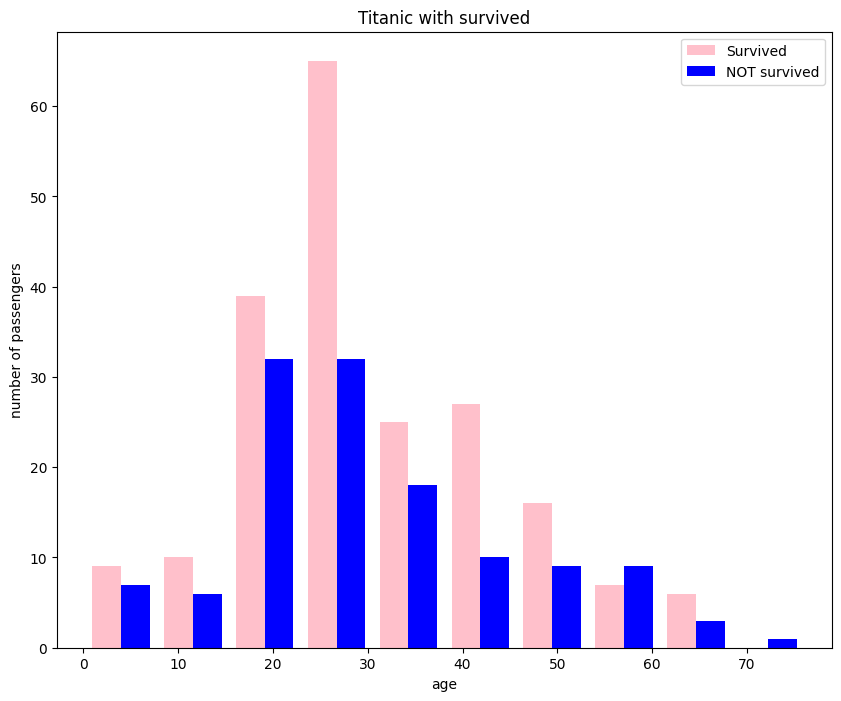

In [ ]:
fig = plt.figure(figsize=(10,8))
plt.hist(x=[df[df['Survived']==0]['Age'],df[df['Survived']==1]['Age']],color=['pink','blue'],label = ['Survived','NOT survived'])
plt.title('Titanic with survived')
plt.xlabel('age')
plt.ylabel('number of passengers')
plt.legend()

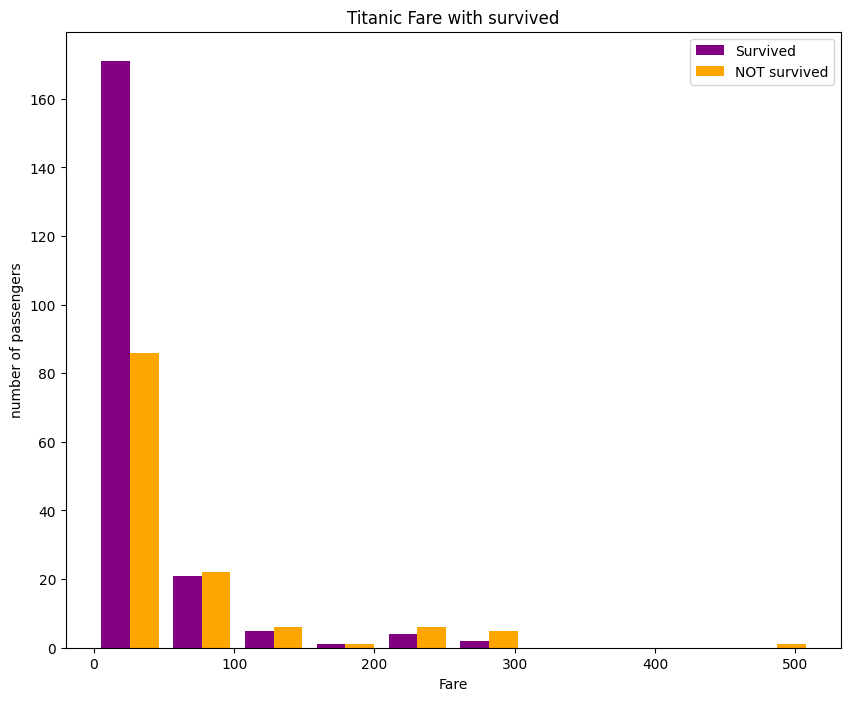

In [ ]:
fig = plt.figure(figsize=(10,8))
plt. hist(x=[df[df['Survived']==0]['Fare'],df[df['Survived']==1]['Fare']],color=['purple','orange'],label = ['Survived','NOT survived'])
plt.title('Titanic Fare with survived')
plt.xlabel('Fare')
plt.ylabel('number of passengers')
plt.legend()

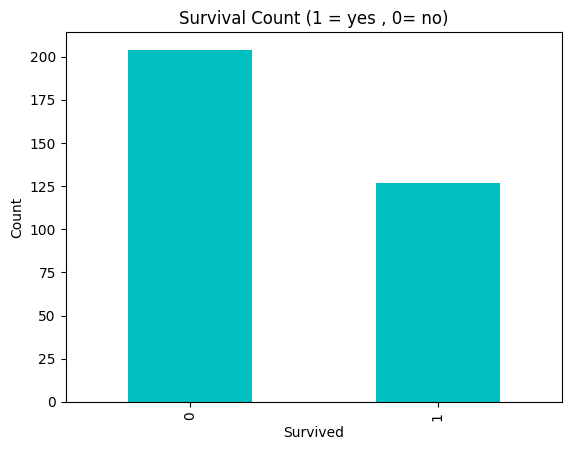

In [ ]:
column = 'Survived'
survival_counts = df[column].value_counts()
survival_counts.plot(kind='bar', color="c")
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survival Count (1 = yes , 0= no)')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.2)

In [ ]:
len(X_train)

264

In [ ]:
len(y_train)

264

In [ ]:
len(X_test)

67

In [ ]:
X_train

,Pclass,Sex,Age,Fare
252,1,1,27.0,136.7792
378,1,1,55.0,50.0000
221,3,1,21.0,8.0500
234,1,1,39.0,71.2833
228,3,1,40.5,15.1000
...,...,...,...,...
172,3,1,23.0,13.9000
330,2,2,48.0,36.7500
140,3,2,10.0,46.9000
270,1,1,46.0,75.2417


In [ ]:
y_train

252    0
378    0
221    0
234    0
228    0
      ..
172    0
330    1
140    1
270    0
169    1
Name: Survived, Length: 264, dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
model.score(X_test,y_train[0:67])

0.47761194029850745

In [ ]:
temp=model.predict(X_test)
temp

array([0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0])

In [ ]:

m=0
for i in range(0,len(temp)):
  if (temp[i]==list(y_test)[i]):
      m+=1

In [ ]:
m

67

In [ ]:
y_test

341    0
147    0
414    1
400    1
415    0
      ..
70     1
115    0
197    1
272    1
393    0
Name: Survived, Length: 67, dtype: int64